In [60]:
# Python file -beginning stage
# Initial set up and read in data from spreadsheet. Will need cleaning and intial data wrangle and assessment and EDA. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the CSV -- NOT YET USED 
df = pd.read_csv(r"C:\Users\adam_\Desktop\2. Udacity - Data Science\PROJECTS\BLOG_POST_NEW\DAta\GDP_Dependent.csv")

df.head(4)


,Country Name,Country Code,GDP INCREASING 1.5%,Population Growth,Life Expectancy,Fertility Rate,Mortality Rate,Inflation,Goods Imported,Gross capital formation,"Revenue, non grant",Military Expenditure,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Afghanistan,AFG,0,2.41,62.75,4.70,60.63,5.74,44.59,14.10,#DIV/0!,1.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,1,-0.86,77.39,1.40,9.43,4.08,43.44,26.02,24.53,1.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,DZA,1,1.65,76.11,2.91,22.63,7.18,22.96,39.91,#DIV/0!,5.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Angola,AGO,1,3.21,62.07,5.33,70.43,20.02,24.57,24.14,21.79,1.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN


** Recall project aim: to see how accurately this data can predict an increase in GDP over the 5 year period - we define "increase" as raising 1.5% per year for at least 3 years. 

## FUNCTIONS WILL BE DEFINED AND SAVED UP TOP, TO BE CALLED THROUGHOUT. HERE IS A LIST OF FUNCTIONS

1. remove_unnamed_columns(df) - 
2. check_missing_values(df) - check in place
3. count_missing_values_per_row(df_cleaned)
4. remove missing rows 
5. impute_missing_values
6. Normalizing the data 

In [ ]:
# DATA CLEANING 
## Remove these unnamed columns that should not have been bought over. 

#Use function 1 
def remove_unnamed_columns(df):
    """
    Removes columns with names starting with "Unnamed" from a pandas DataFrame.

    Args:
        df: The pandas DataFrame to clean.

    Returns:
        A new pandas DataFrame with the "Unnamed" columns removed.
    """
    unnamed_cols = [col for col in df.columns if 'Unnamed:' in col]
    df = df.drop(columns=unnamed_cols, errors='ignore') 
    return df


In [ ]:
# define function to check for any missing values - function 2 
def check_missing_values(df_cleaned):
    """
    Checks for missing values in our DataFrame and prints a summary.

    Args:
        df: The pandas DataFrame.
    """
    missing_values = df_cleaned.isnull().sum()
    total_missing = missing_values.sum()

    if total_missing == 0:
        print("No missing values found in the DataFrame.")
    else:
        print("Missing Values Summary:")
        print(missing_values)
        print(f"\nTotal missing values: {total_missing}")

In [ ]:
# Calculate the missing values per country in new column 
#Create function 3
def count_missing_values_per_row(df_cleaned):
    """
    Counts missing values (NaN, None, or '#DIV/0!') in each row of a DataFrame
    and adds the count to a new column named 'Missing Values Count'.

    Args:
        df_cleaned: The pandas DataFrame.

    Returns:
        The DataFrame with the new 'Missing Values Count' column.
    """

    # Replace '#DIV/0!' with NaN for consistent missing value handling
    df_cleaned = df_cleaned.replace('#DIV/0!', np.nan)

    # Count the number of missing values in each row
    df_cleaned['Missing Values Count'] = df_cleaned.isnull().sum(axis=1)

    return df_cleaned

In [ ]:
# function to remove the rows with 4 or more missing values - funciton 4 
def remove_rows_with_many_missing(df_cleaned, threshold=4):
    """
    Removes rows from a DataFrame where the 'Missing Values Count' is greater than or equal to a given threshold.

    Args:
        df_cleaned: The pandas DataFrame with the 'Missing Values Count' column.
        threshold: The minimum number of missing values for a row to be removed.

    Returns:
        The DataFrame with the rows removed.
    """
    df_filtered = df_cleaned[df_cleaned['Missing Values Count'] < threshold]
    return df_filtered

In [ ]:
# Impute any remaining missing values, using mean values and sklearn - function 5 
from sklearn.impute import SimpleImputer

#define function for umputation
def impute_missing_values(df_cleaned, strategy='mean'):
    """
    Imputes missing values in a DataFrame using a specified strategy.

    Args:
        df_cleaned: The updated pandas DataFrame.
        strategy: The imputation strategy ('mean', 'median', or 'most_frequent').

    Returns:
        The DataFrame with imputed missing values.
    """

    # Create an imputer object
    imputer = SimpleImputer(strategy=strategy)

    # Identify numerical columns for imputation
    numerical_cols = df_cleaned.select_dtypes(include=np.number).columns

    # Impute missing values in numerical columns
    df_cleaned[numerical_cols] = imputer.fit_transform(df_cleaned[numerical_cols])

    return df

In [ ]:
# Function 6 - NOrmalise the data 
from sklearn.preprocessing import MinMaxScaler

def normalize_dataframe(df):
    """
    Normalizes all numerical values in a pandas DataFrame using MinMaxScaler.

    Args:
        df: The ML DataFrame.

    Returns:
        The normalized DataFrame.
    """

    # Select numerical columns
    numerical_cols = df.select_dtypes(include=['float']).columns

    # Create a MinMaxScaler object
    scaler = MinMaxScaler()

    # Normalize the numerical columns
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    return df

### ^^^^^^ FUNCTIONS ARE ALL SAVED ABOVE ^^^^^ ### 

### CODE STARTS BELOW 

In [132]:
# Firstly, remove the numamed columns that were bought over from import
df_cleaned = remove_unnamed_columns(df)

print(df_cleaned.head()) # looks ok 

   GDP INCREASING 1.5%  Population Growth  Life Expectancy  Fertility Rate  \
0                  0.0           0.837500         0.304886        0.641196   
1                  1.0           0.383333         0.757576        0.093023   
2                  1.0           0.731944         0.717996        0.343854   
3                  1.0           0.948611         0.283859        0.745847   
4                  1.0           0.575000         0.801793        0.117940   

   Mortality Rate  Inflation  Goods Imported  Gross capital formation  \
0        0.496734   0.041335        0.279743                 0.227686   
1        0.062357   0.030050        0.271541                 0.546232   
2        0.174345   0.051125        0.125464                 0.917424   
3        0.579876   0.138419        0.136947                 0.495991   
4        0.066175   0.026446        0.385949                      NaN   

   Revenue, non grant  Military Expenditure  
0                 NaN              0.110492  


FIX THE ISSUES OF THE NUMEROUS #DIV/0! THROUGHOUT. 
We have 9 independent variables in this data set and will need some level of imputation. Would be acceptable to impute 3 of these per country so will first text how many missing values each country has. 

If the country has 4 or more missing values these rows will be deleted. 

In [133]:
# call the function onto our data and view - we have 174 rows ATM 
df_missing = count_missing_values_per_row(df_cleaned)

print(df_missing.head(5))

   GDP INCREASING 1.5%  Population Growth  Life Expectancy  Fertility Rate  \
0                  0.0           0.837500         0.304886        0.641196   
1                  1.0           0.383333         0.757576        0.093023   
2                  1.0           0.731944         0.717996        0.343854   
3                  1.0           0.948611         0.283859        0.745847   
4                  1.0           0.575000         0.801793        0.117940   

   Mortality Rate  Inflation  Goods Imported  Gross capital formation  \
0        0.496734   0.041335        0.279743                 0.227686   
1        0.062357   0.030050        0.271541                 0.546232   
2        0.174345   0.051125        0.125464                 0.917424   
3        0.579876   0.138419        0.136947                 0.495991   
4        0.066175   0.026446        0.385949                      NaN   

   Revenue, non grant  Military Expenditure  Missing Values Count  
0                 NaN   

In [72]:
# Remove rows with 4 or more missing values
df_cleaned = remove_rows_with_many_missing(df_missing)

# Print the resulting DataFrame - we are down to 160 rows in this data set. We now have 160 rows 
print(df_cleaned)

            Country Name Country Code  GDP INCREASING 1.5%  Population Growth  \
0            Afghanistan          AFG                    0               2.41   
1                Albania          ALB                    1              -0.86   
2                Algeria          DZA                    1               1.65   
3                 Angola          AGO                    1               3.21   
4    Antigua and Barbuda          ATG                    1               0.52   
..                   ...          ...                  ...                ...   
169              Uruguay          URY                    1              -0.04   
170           Uzbekistan          UZB                    1               1.93   
171             Viet Nam          VNM                    1               0.84   
172   West Bank and Gaza          PSE                    1               2.45   
173               Zambia          ZMB                    1               2.85   

    Life Expectancy Fertili

In [73]:
#Check for missing values

check_missing_values(df_cleaned)

Missing Values Summary:
Country Name                0
Country Code                0
GDP INCREASING 1.5%         0
Population Growth           0
Life Expectancy             1
Fertility Rate              0
Mortality Rate              5
Inflation                   0
Goods Imported              9
Gross capital formation    12
Revenue, non grant         34
Military Expenditure       27
Missing Values Count        0
dtype: int64

Total missing values: 88


In [ ]:
# View with imputed values and then check
df_final = impute_missing_values(df_cleaned, strategy='mean') 

C:\Users\adam_\AppData\Local\Temp/ipykernel_93620/1416653012.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numerical_cols] = imputer.fit_transform(df_cleaned[numerical_cols])


In [76]:
check_missing_values(df_final)

Missing Values Summary:
Country Name                 0
Country Code                 0
GDP INCREASING 1.5%          0
Population Growth            0
Life Expectancy              0
Fertility Rate               0
Mortality Rate               0
Inflation                    0
Goods Imported               0
Gross capital formation      0
Revenue, non grant           0
Military Expenditure         0
Unnamed: 12                174
Unnamed: 13                174
Unnamed: 14                174
Unnamed: 15                174
Unnamed: 16                174
Unnamed: 17                174
Unnamed: 18                174
dtype: int64

Total missing values: 1218


Data now looks clean, however somehow the unnamed colums are back - re-run that function on the df_final dataset then retest

In [80]:
df_ml = remove_unnamed_columns(df_final)


In [81]:
check_missing_values(df_ml)

No missing values found in the DataFrame.


SECTION 2 - some EDA before proceeding to build the model. 

In [106]:
# First ensure all values in DF are as floats 
df_ml = df_ml.apply(pd.to_numeric, errors='coerce').astype(float)

# country Name and Code can be taken out as these are not suitable variables
df_ml = df_ml.drop(columns = ['Country Name', 'Country Code'])

print(df_ml.dtypes)

GDP INCREASING 1.5%        float64
Population Growth          float64
Life Expectancy            float64
Fertility Rate             float64
Mortality Rate             float64
Inflation                  float64
Goods Imported             float64
Gross capital formation    float64
Revenue, non grant         float64
Military Expenditure       float64
dtype: object


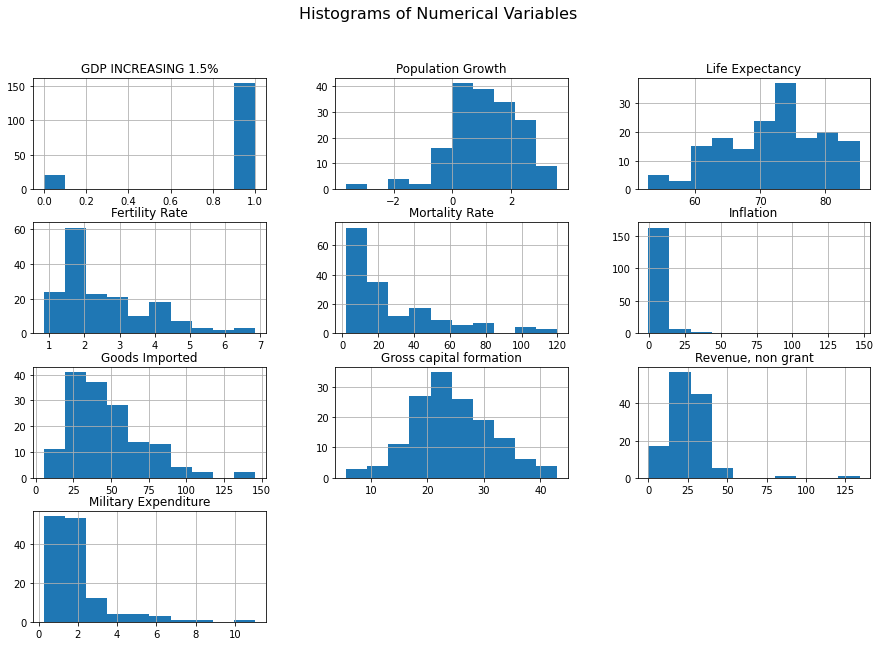

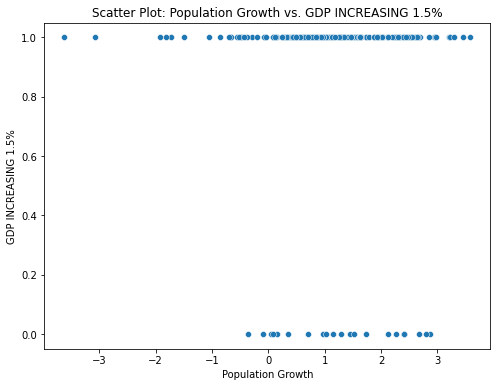

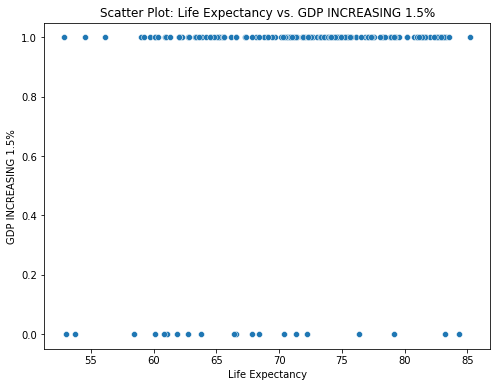

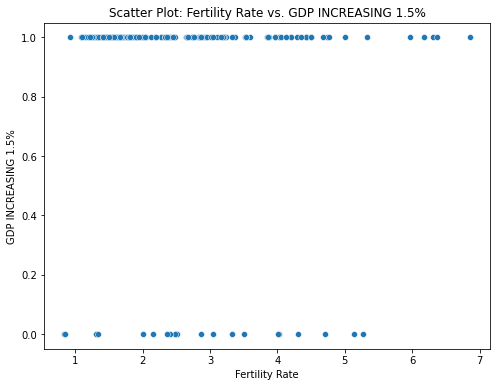

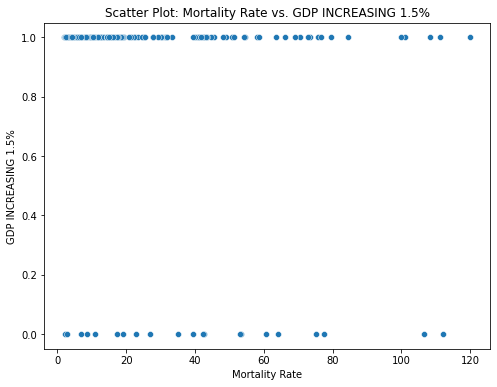

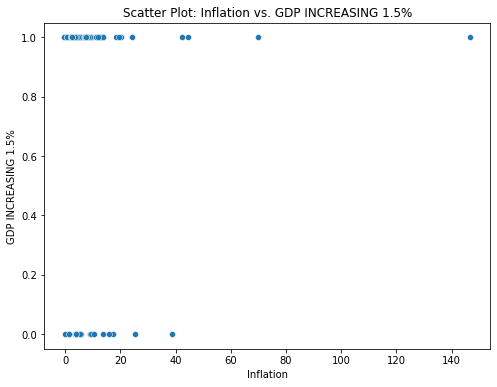

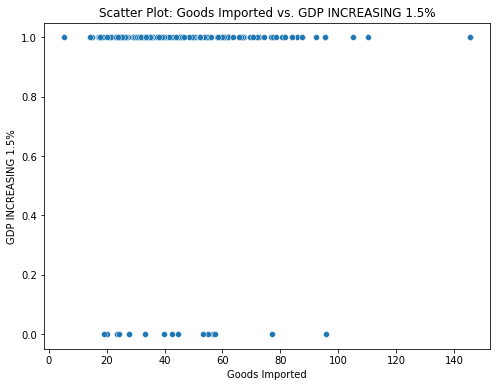

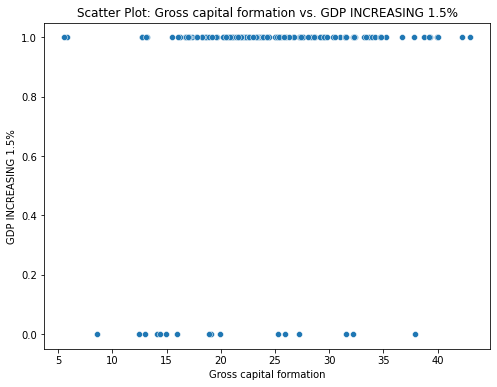

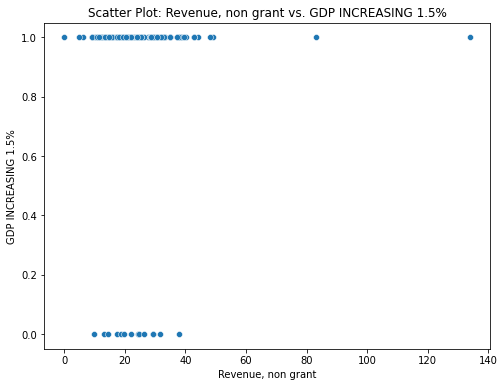

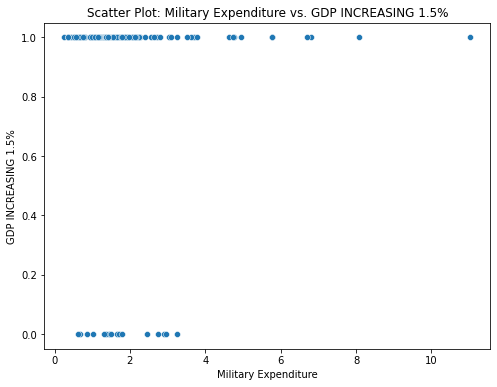

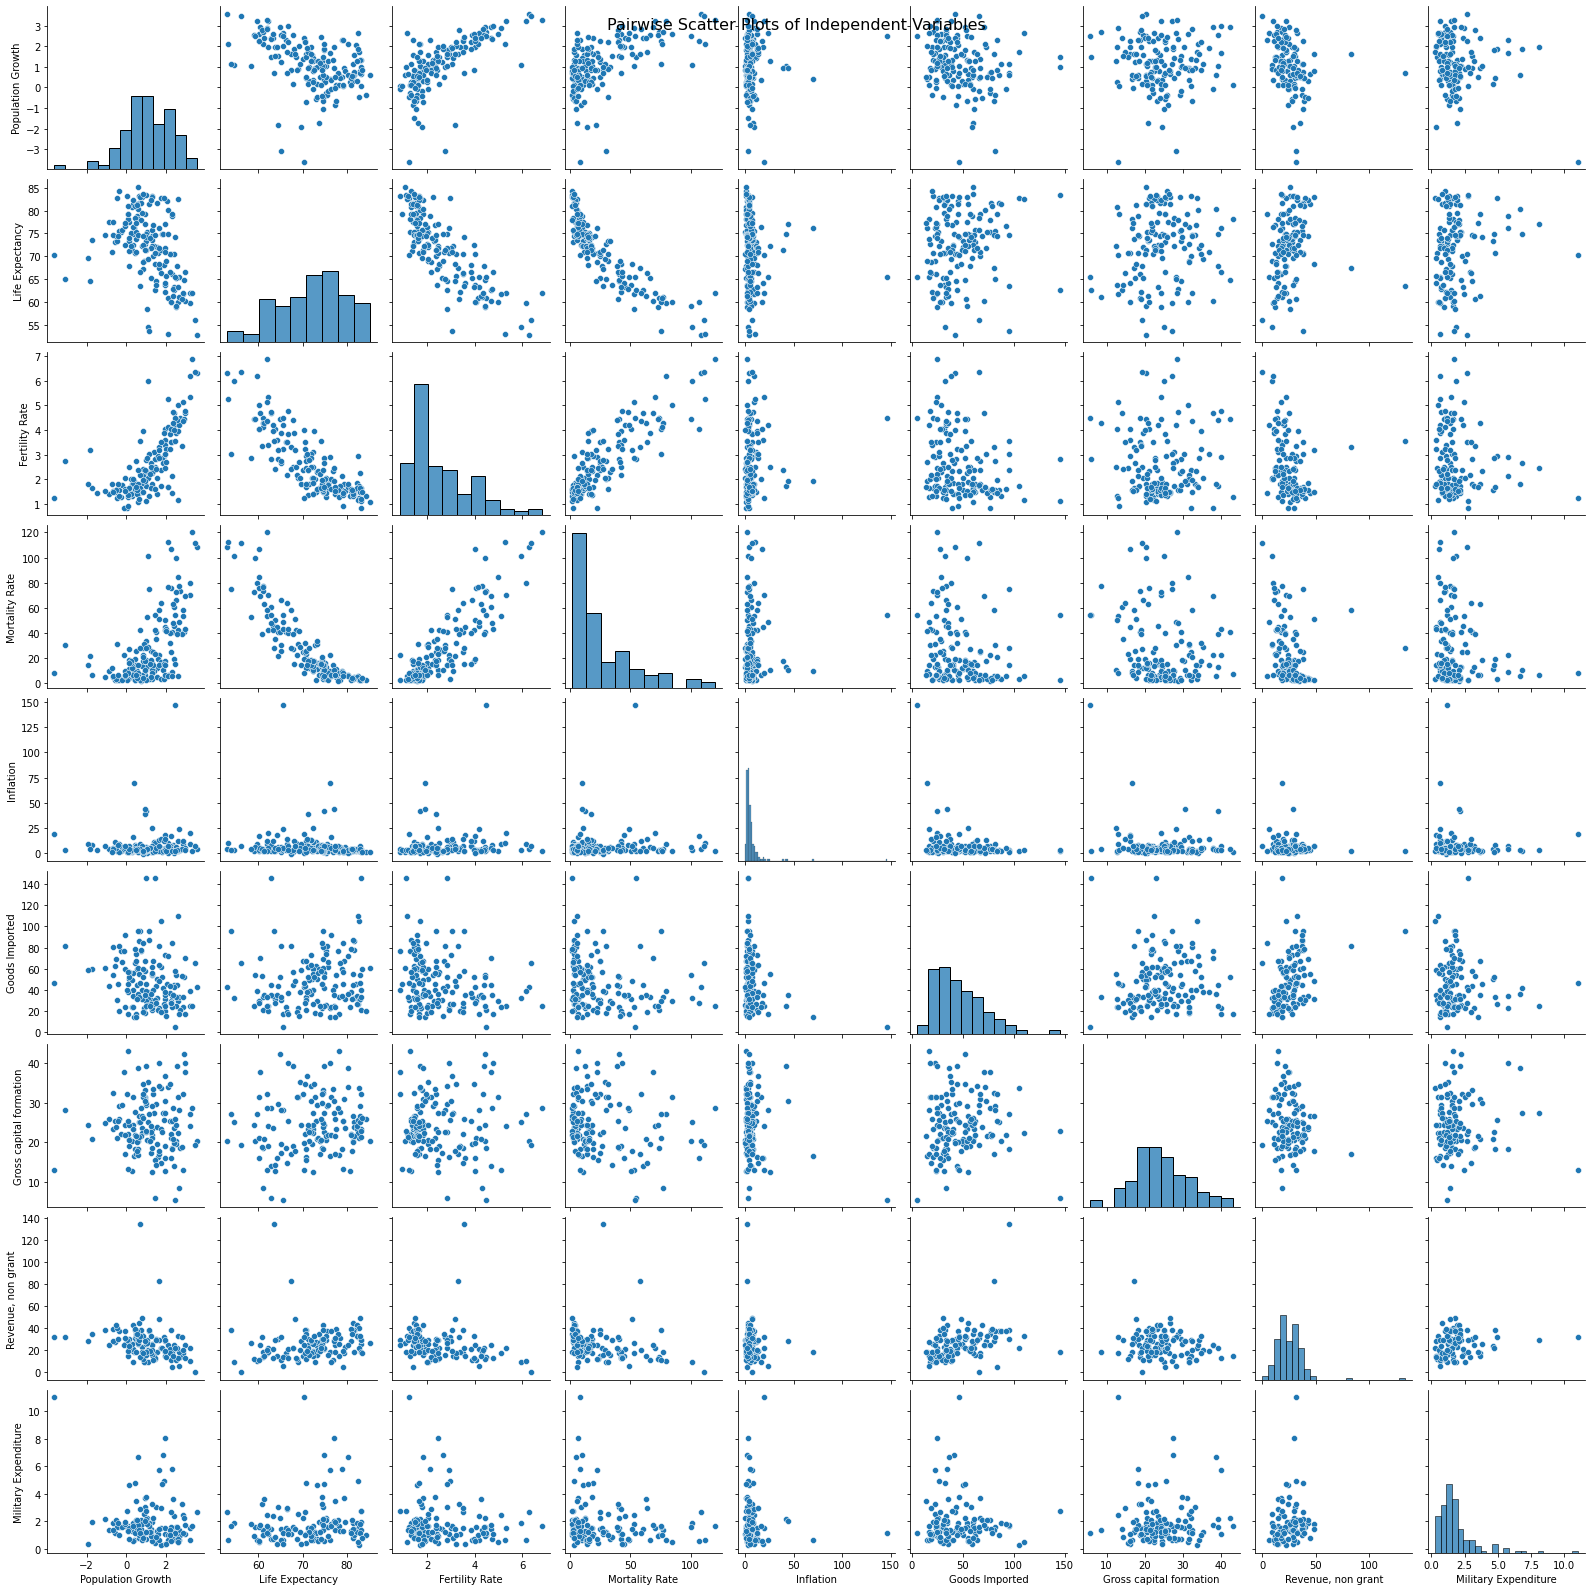

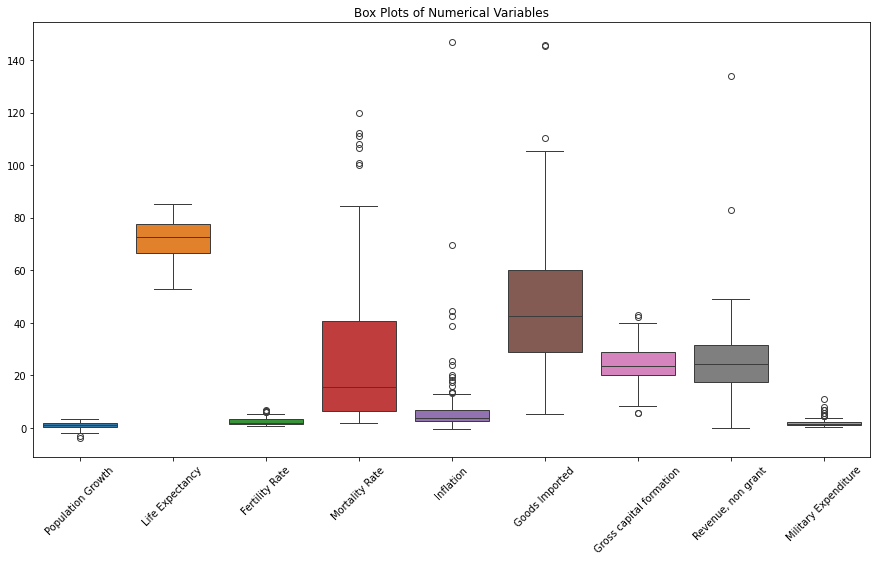

In [107]:
# Write a funciton to include some of the intial visuals 
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_eda(df_ml, dependent_variable):
    """
    Performs EDA visualizations on a DataFrame.

    Args:
        df_ml: The final DataFrame.
        dependent_variable: GDP Column
    """

    # 1. Histograms
    df.hist(figsize=(15, 10))
    plt.suptitle("Histograms of Numerical Variables", fontsize=16)
    plt.show()



    # 2. Scatter Plots
    numerical_cols = df.select_dtypes(include=['float']).columns.tolist()
    numerical_cols.remove(dependent_variable) 

    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=col, y=dependent_variable, data=df)
        plt.title(f"Scatter Plot: {col} vs. {dependent_variable}")
        plt.show()

    # Pairwise scatter plots of independent variables
    sns.pairplot(df[numerical_cols])
    plt.suptitle("Pairwise Scatter Plots of Independent Variables", fontsize=16)
    plt.show()

    # 3. Box Plots
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df[numerical_cols])
    plt.title("Box Plots of Numerical Variables")
    plt.xticks(rotation=45)
    plt.show()

# Load the df_ml
df = df_ml

# Dependend variable dec 
dependent_variable_name = "GDP INCREASING 1.5%"

# Run the EDA visualizations
visualize_eda(df, dependent_variable_name)

### SECTION 3: Build machine learning prediction model 

In [122]:
# First it will be important to normalize all values in the model to avoid skewing the results.
# USe the function 

df_ml = normalize_dataframe(df_ml)

df_ml.head(3)


,GDP INCREASING 1.5%,Population Growth,Life Expectancy,Fertility Rate,Mortality Rate,Inflation,Goods Imported,Gross capital formation,"Revenue, non grant",Military Expenditure
0,0.0,0.837500,0.304886,0.641196,0.496734,0.041335,0.279743,0.227686,NaN,0.110492
1,1.0,0.383333,0.757576,0.093023,0.062357,0.030050,0.271541,0.546232,0.183019,0.101207
2,1.0,0.731944,0.717996,0.343854,0.174345,0.051125,0.125464,0.917424,NaN,0.510678


In [123]:
# Split the data into testing and training datasets , with funciotn
from sklearn.model_selection import train_test_split

def create_x_y_split(df_ml, dependent_variable_column):
    """
    Splits a DataFrame into X (independent variables) and y (dependent variable)
    for a machine learning classification problem.

    Args:
        df: The pandas DataFrame.
        dependent_variable_column: The name of the dependent variable column.

    Returns:
        X (DataFrame): Independent variables.
        y (Series): Dependent variable.
    """
    try:
        y = df[dependent_variable_column]
        X = df.drop(columns=[dependent_variable_column])
        return X, y
    except KeyError:
        print(f"Error: Dependent variable column '{dependent_variable_column}' not found.")
        return None, None

def create_train_test_split(X, y, test_size=0.2, random_state=42):
    """
    Splits the X and y datasets into training and testing sets.

    Args:
        X: The independent variables (DataFrame).
        y: The dependent variable (Series).
        test_size: The proportion of the dataset to include in the test split.
        random_state: Controls the shuffling applied to the data before splitting.

    Returns:
        X_train, X_test, y_train, y_test: Training and testing sets.
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    return X_train, X_test, y_train, y_test


In [124]:
# name of dependent variable column
dependent_variable_column_name = "GDP INCREASING 1.5%"

# Create X and y datasets
X, y = create_x_y_split(df_ml, dependent_variable_column_name)

if X is not None and y is not None:
    # Create training and testing sets
    X_train, X_test, y_train, y_test = create_train_test_split(X, y)

    # Print the shapes of the resulting datasets to verify the split
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)

X_train shape: (139, 9)
X_test shape: (35, 9)
y_train shape: (139,)
y_test shape: (35,)


In [125]:
# Train a decision tree classifier 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth= 4, random_state=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=4)

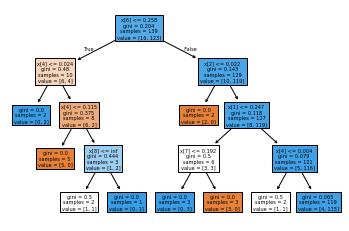

In [126]:
#plot the decision tree
from sklearn.tree import plot_tree
plot_tree(model, filled=True)
plt.show()

In [127]:
# Make predictions 
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [128]:
# Calculate the accuracy on training and test set
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_pred_train, y_train)
acc_test = accuracy_score(y_pred_test, y_test)
print(acc_train)
print(acc_test)

0.9424460431654677
0.8571428571428571


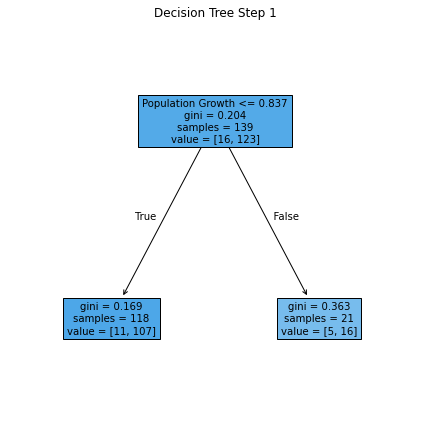

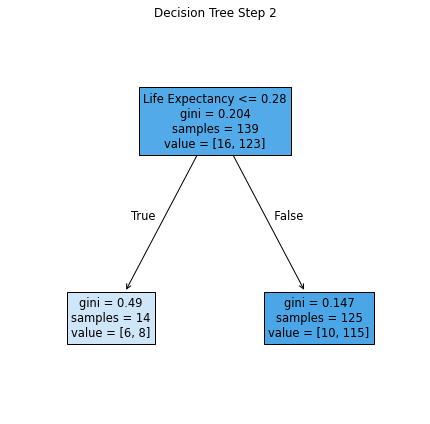

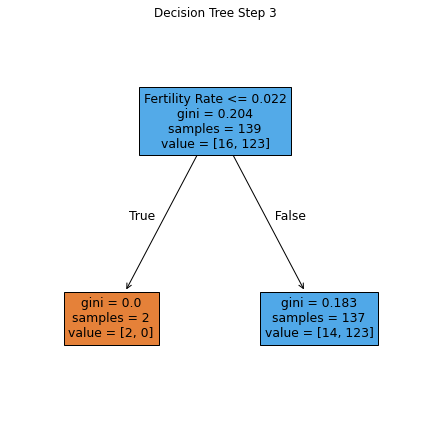

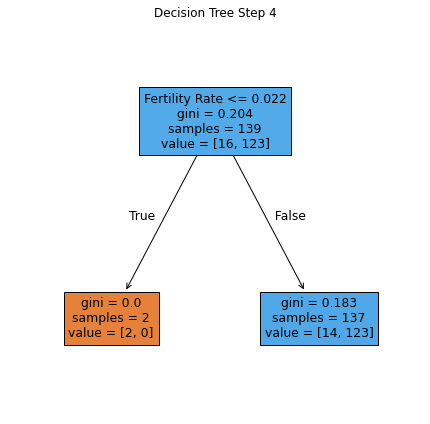

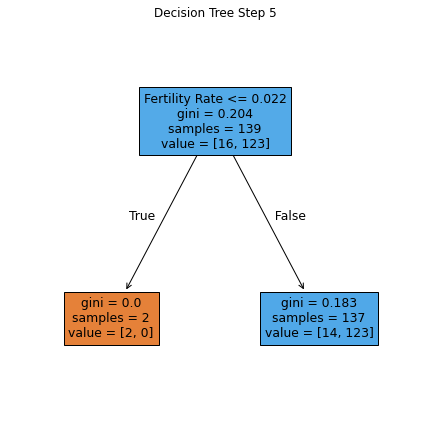

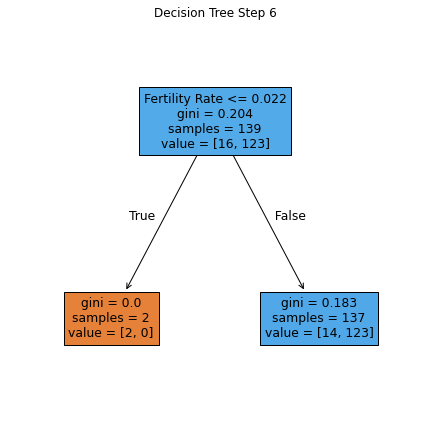

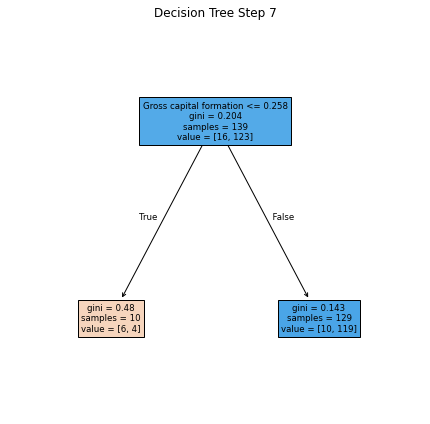

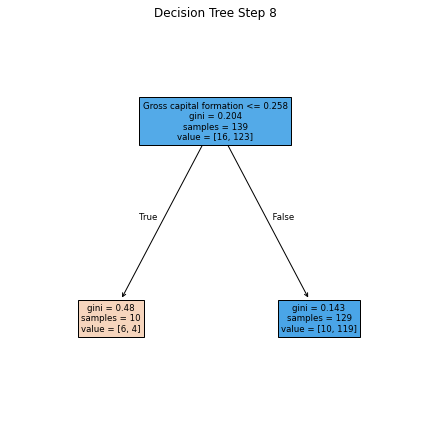

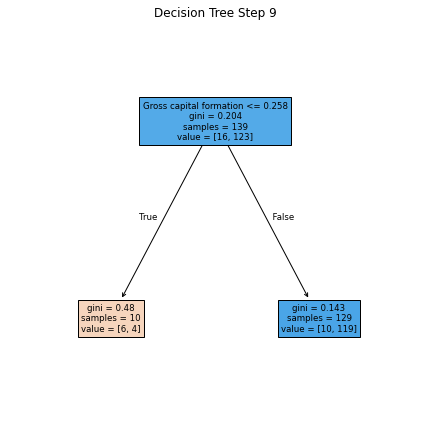

In [129]:
# plot several decision trees with different max_depth
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_tree_steps(X_train, y_train, feature_names=None, num_trees=5):
    """
    Plots a series of decision trees with max_depth=1 and decision boundaries (if 2D).

    Args:
        X_train: Training data (DataFrame).
        y_train: Training labels (Series).
        feature_names: List of feature names (optional).
        num_trees: Number of trees to plot.
    """

    for i in range(min(num_trees, X_train.shape[1])):
        clf = DecisionTreeClassifier(max_depth=1, random_state=42)
        clf.fit(X_train.iloc[:, :i + 1], y_train)

        plt.figure(figsize=(12, 6))

        # Plot Decision Tree
        plt.subplot(1, 2, 1)  # Create subplot for tree
        plot_tree(clf, filled=True, feature_names=feature_names[:i + 1] if feature_names else None)
        plt.title(f"Decision Tree Step {i + 1}")

        # Plot Decision Boundary (if 2D)
        if X_train.shape[1] == 2 and i + 1 == 2:  # Only plot if 2 features
            plt.subplot(1, 2, 2)  # Create subplot for boundary
            plot_decision_boundary(X_train, y_train, clf)
            plt.title("Decision Boundary")

        plt.tight_layout()
        plt.show()

def plot_decision_boundary(X, y, clf):
    """
    Plots the decision boundary of a trained classifier.

    Args:
        X: Feature data (DataFrame).
        y: Target labels (Series).
        clf: Trained classifier.
    """
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=20, edgecolor='k')

# Example Usage (replace with your data)

dependent_variable_column_name = "GDP INCREASING 1.5%"

y = df_ml[dependent_variable_column_name]
X = df_ml.drop(columns=[dependent_variable_column_name])

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot decision tree steps
plot_decision_tree_steps(X_train, y_train, feature_names=X_train.columns.tolist(), num_trees=len(X_train.columns))


In [130]:
### EVALUATION OF THE MODEL PERFORMANCE
# Precision , recall and F1 are better measures overall. 
from sklearn.metrics import accuracy_score, precision_score, recall_score
y.pred = model.predict(X_test)

acc2 = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

print(precision)
print(recall)

0.8571428571428571
1.0


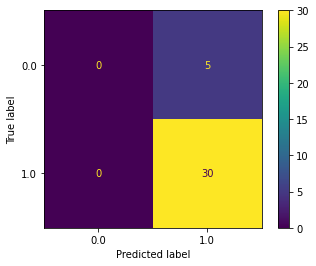

In [131]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)